<a href="https://colab.research.google.com/github/Farhan269/Drought-prediction/blob/main/Drought/Final_SPEI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Ishwardi.csv to Ishwardi.csv


{'Ishwardi.csv': b'year,Month Order,Month,prcp(mm),Tmax(\xcb\x9aC),Tmin(\xcb\x9aC),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12\r\n1981,1,jan,30,23.57419359,11.69999996,222.8000004,70.4516129,2.313320516,87.01389,1.813573733,NaN,NaN,NaN\r\n1981,2,feb,81,26.44642857,13.55714287,228.6999981,68.08928571,1.513923429,102.43569,1.894641623,NaN,NaN,NaN\r\n1981,3,mar,64,30.21290312,17.38064517,252.8999996,64.53225806,2.331574839,144.99705,1.197579752,1.9027411,NaN,NaN\r\n1981,4,apr,360,31.4,21.2,254.3999996,71.5,3.0369108,149.17473,2.43119657,2.238628532,NaN,NaN\r\n1981,5,may,323,32.41935484,23.72258069,240.5000007,76.20967742,3.775325806,156.34953,1.785859165,2.256429267,NaN,NaN\r\n1981,6,jun,223,32.48333333,26.03666668,140.5000001,80.13333333,3.4433184,135.68414,0.02637155,2.288249656,2.406761962,NaN\r\n1981,7,jul,478,31.18709675,25.82580646,130.7999998,83.70967742,3.250928903,124.59253,1.455305069,1.904349682,2.486588541,NaN\r\n1981,8,aug,211,31.97419351,26.51612903

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df= pd.read_csv('Ishwardi.csv')

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
df.isnull().sum()


year                 0
Month Order          0
Month                0
prcp(mm)             0
Tmax(˚C)             0
Tmin(˚C)             0
SSH(hrs)             0
Humidity avg %       0
wind speed (m/s)     0
PET                  0
spei1                0
spei3                2
spei6                5
spei12              11
dtype: int64

Separate null value

In [ ]:
test_data=df[df["spei12"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,NaN
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,NaN
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,NaN
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,NaN
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,NaN


In [ ]:
dat = df.dropna()

In [ ]:
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
11,1981,12,dec,48,24.787097,12.022581,231.000001,67.467742,1.782286,87.52109,1.819494,-1.256290,0.935759,2.179214
12,1982,1,jan,0,25.400000,10.983871,240.100000,65.677419,1.007307,97.37734,-1.346388,0.649493,0.290084,2.100614
13,1982,2,feb,8,26.707143,12.321429,228.500001,61.750000,2.048574,106.82316,-0.059377,0.924485,0.522470,2.065718
14,1982,3,mar,81,30.032258,16.990323,246.600000,62.903226,2.670110,145.17363,1.451458,0.889373,-0.331903,2.132655
15,1982,4,apr,133,34.830000,22.763333,249.800001,67.000000,3.606224,171.43721,1.046341,1.227840,1.444260,1.760776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(433, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-13-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei12']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953
5,1981,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414
6,1981,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253
7,1981,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709
8,1981,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418
9,1981,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691


In [ ]:
x_test.shape

(11, 9)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-17-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([0.77463287, 1.08351318, 0.72237126, 1.14156441, 0.6087868 ,
       0.18573105, 0.91423905, 0.16141234, 0.87002394, 0.80933688,
       0.5473786 ])

In [ ]:
test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred

<ipython-input-20-6bcee27984da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred


In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337


In [ ]:
df.loc[df.spei12.isnull(),'spei12'] = y_pred

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei6

In [ ]:
test_data=df[df["spei6"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(439, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-29-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei6']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-32-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.73433602, 0.87501459, 0.52255415, 1.34227872, 0.8434945 ])

In [ ]:
df.loc[df.spei6.isnull(),'spei6'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei3

In [ ]:
test_data=df[df["spei3"].isnull()]
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-38-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei3']
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test


,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-41-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.90774864, 0.72796066])

In [ ]:
df.loc[df.spei3.isnull(),'spei3'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,0.907749,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,0.727961,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


<ipython-input-44-2027c78a47a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

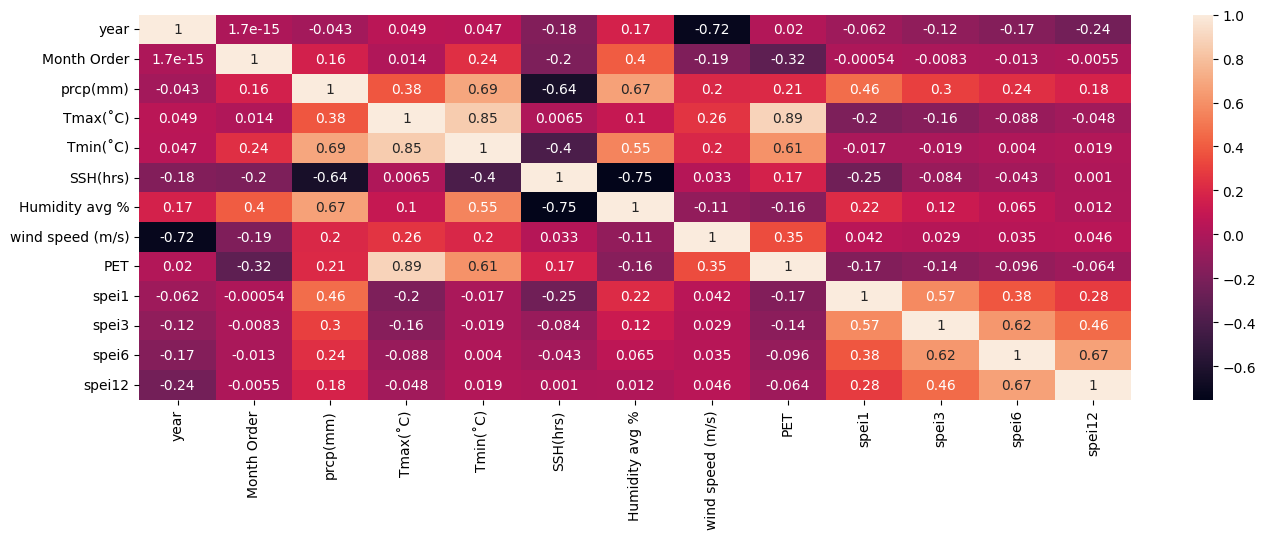

In [ ]:
corr_matrix=df.corr()
plt.figure(1, figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

**For SPEI-3**

In [ ]:
df_3 = df.drop([ 'spei1', 'spei6', 'spei12'],axis=1,)

In [ ]:
df_3

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei3
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,0.907749
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,0.727961
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.902741
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.238629
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,2.256429
...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.680426
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.817048
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.312087
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,1.348937


In [ ]:
df_3.loc[df_3["spei3"]>-0.5, 'drought_category'] = 'No-drought'
df_3.loc[(df_3["spei3"]<=-0.5) & (df_3["spei3"]>=-0.99 ), 'drought_category'] = 'Mild'
df_3.loc[(df_3["spei3"]<=-1) & (df_3["spei3"]>=-1.49 ), 'drought_category'] = 'Moderate'
df_3.loc[(df_3["spei3"]<=-1.50) & (df_3["spei3"]>=-1.99 ), 'drought_category'] = 'Severe'
df_3.loc[df_3["spei3"]<-2, 'drought_category'] = 'Extreme'
df_3

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei3,drought_category
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,0.907749,No-drought
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,0.727961,No-drought
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.902741,No-drought
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.238629,No-drought
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,2.256429,No-drought
...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.680426,No-drought
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.817048,No-drought
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.312087,No-drought
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,1.348937,No-drought


In [ ]:
df_3["drought_category"].value_counts()

No-drought    297
Mild           67
Moderate       49
Severe         27
Extreme         2
Name: drought_category, dtype: int64

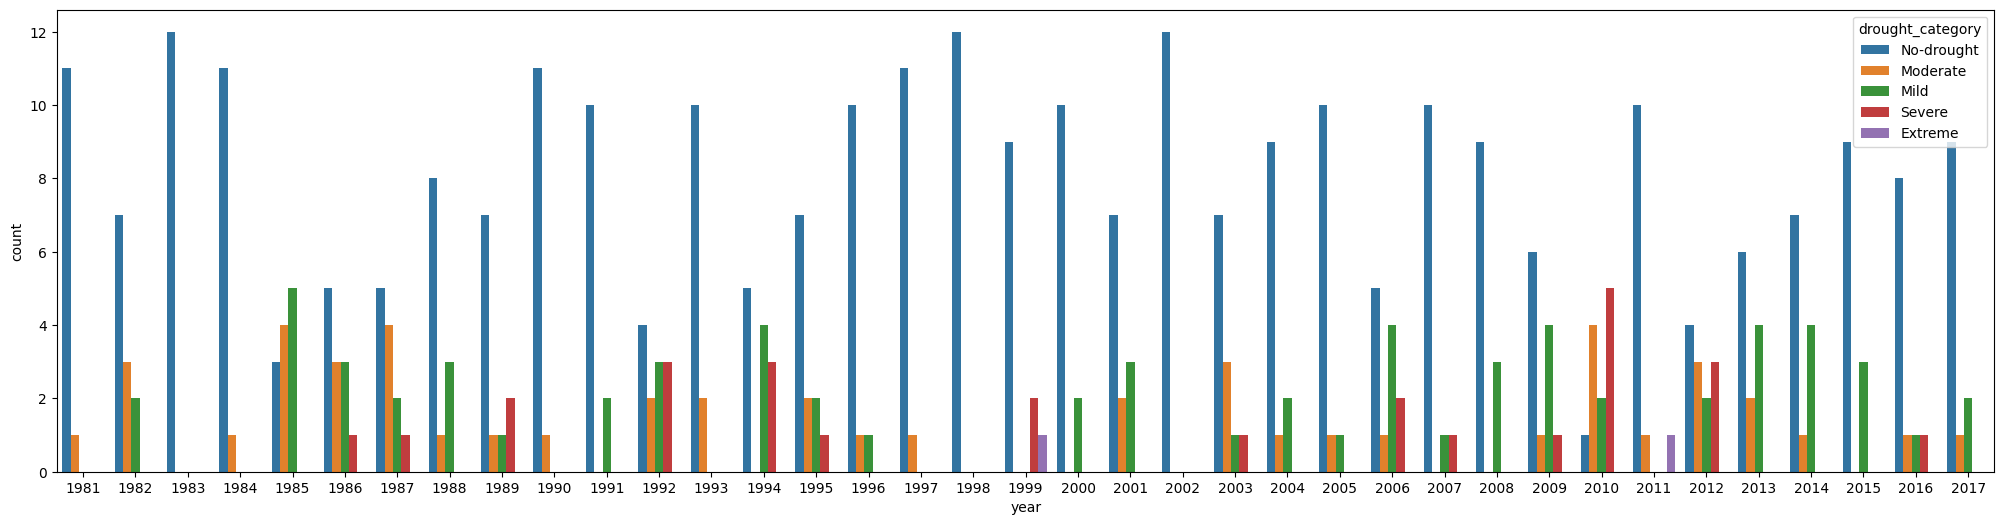

In [ ]:
plt.figure(figsize=(25, 6))  # Set the figure size as desired (width, height)
sns.countplot(data=df_3, x = 'year', hue='drought_category' )
plt.show()

<ipython-input-50-80eeeae29907>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_3.corr()


<Axes: >

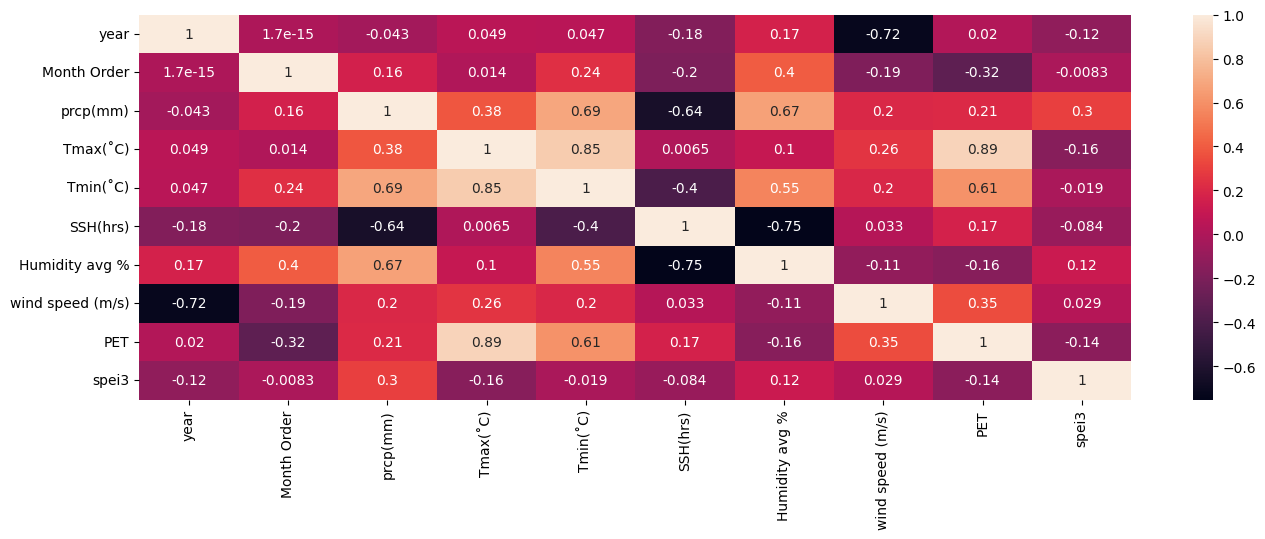

In [ ]:
corr_matrix=df_3.corr()
plt.figure(1, figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

For prediction SVM

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
df['Month']=ord_mon.fit_transform(df[['Month']])

In [ ]:
x=df[['prcp(mm)', 'Tmax(˚C)', 'Tmin(˚C)','SSH(hrs)','Humidity avg %','PET']]
y=df['spei3']
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
xtrain

,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,PET
329,206,32.886667,25.800000,132.900000,82.666667,142.51181
381,157,31.848387,21.703226,246.400000,77.387097,124.49237
371,0,24.190323,12.303226,131.500000,76.145161,84.09075
364,155,34.116129,24.064516,216.700000,77.225806,171.82275
428,381,33.183333,26.230000,160.800000,86.633333,123.09989
...,...,...,...,...,...,...
299,1,26.490322,12.948387,250.299998,68.370968,93.41996
22,67,28.616667,16.443333,216.600000,69.233333,100.90701
72,2,25.329032,10.141935,254.300002,71.903226,98.67974
15,133,34.830000,22.763333,249.800001,67.000000,171.43721


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVR(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([1.36109352e-02, 4.59369860e+00, 7.78164864e-03, 3.34058678e+01,
        7.53769875e-03, 2.96219881e+01]),
 'std_fit_time': array([2.48654232e-03, 7.43306295e-01, 1.36520285e-04, 1.51431591e+01,
        5.18279320e-04, 4.75960140e+00]),
 'mean_score_time': array([0.00481491, 0.00286222, 0.00301003, 0.00285106, 0.02475686,
        0.00527472]),
 'std_score_time': array([9.29105181e-05, 5.03341160e-04, 6.09535178e-05, 4.86023800e-04,
        4.42098628e-02, 4.75931852e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'li

In [ ]:
df_svm = pd.DataFrame(clf.cv_results_)
df_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013611,0.002487,0.004815,0.000093,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.056084,-0.005860,-0.026318,0.002495,0.004155,-0.016323,0.022644,6
1,4.593699,0.743306,0.002862,0.000503,1,linear,"{'C': 1, 'kernel': 'linear'}",0.229696,0.220344,0.190062,0.282130,0.223256,0.229098,0.029824,1
2,0.007782,0.000137,0.003010,0.000061,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-0.037154,-0.004225,-0.024288,0.001982,0.003608,-0.012015,0.016020,4
3,33.405868,15.143159,0.002851,0.000486,10,linear,"{'C': 10, 'kernel': 'linear'}",0.171903,0.200588,0.237027,0.312284,0.194348,0.223230,0.049198,2
4,0.007538,0.000518,0.024757,0.044210,20,rbf,"{'C': 20, 'kernel': 'rbf'}",-0.037154,-0.004225,-0.024288,0.001982,0.003608,-0.012015,0.016020,4
5,29.621988,4.759601,0.005275,0.004759,20,linear,"{'C': 20, 'kernel': 'linear'}",0.163712,0.193769,0.206979,0.285345,0.186426,0.207246,0.041497,3


In [ ]:
df_svm[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,-0.016323
1,1,linear,0.229098
2,10,rbf,-0.012015
3,10,linear,0.223230
4,20,rbf,-0.012015
5,20,linear,0.207246


In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.229097647870962

In [ ]:
model_svr = SVR(kernel='linear',C=1,gamma='auto')

In [ ]:
model_svr.fit(xtrain,ytrain)

SVR(C=1, gamma='auto', kernel='linear')

In [ ]:
model_svr.score(xtest,ytest)

0.18190600138523882

In [ ]:
pred_svm = model_svr.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_svm)
mse = mean_squared_error(ytest,pred_svm)
rmse = mean_squared_error(ytest,pred_svm, squared = False)
r2 = r2_score(ytest,pred_svm)


def calculate_nse(observed, predicted):
    obs_mean = np.mean(observed)
    ss_diff_obs_pred = np.sum((observed - predicted) ** 2)
    ss_diff_obs_mean = np.sum((observed - obs_mean) ** 2)
    nse = 1 - (ss_diff_obs_pred / ss_diff_obs_mean)
    return nse
nse= calculate_nse(ytest, pred_svm)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.18190600138523882
Mean Absolute Error: 0.654782290559034
Mean Squared Error: 0.6768108059479214
r2 score: 0.18190600138523882
RMSE: 0.8226851195615011


In [ ]:
com = pd.concat([ytest, pd.Series(pred_svm,index=xtest.index)],axis=1)

In [ ]:
com

,spei3,0
397,0.762966,0.024184
203,-0.174516,0.581347
119,0.162837,-0.014043
331,-0.206332,0.046512
175,-0.223758,0.178279
...,...,...
306,-0.388914,0.391382
215,0.452028,0.408583
89,1.020785,0.423124
198,0.621599,1.387334


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,0.762966,0.024184
1,-0.174516,0.581347
2,0.162837,-0.014043
3,-0.206332,0.046512
4,-0.223758,0.178279
...,...,...
84,-0.388914,0.391382
85,0.452028,0.408583
86,1.020785,0.423124
87,0.621599,1.387334


<Axes: >

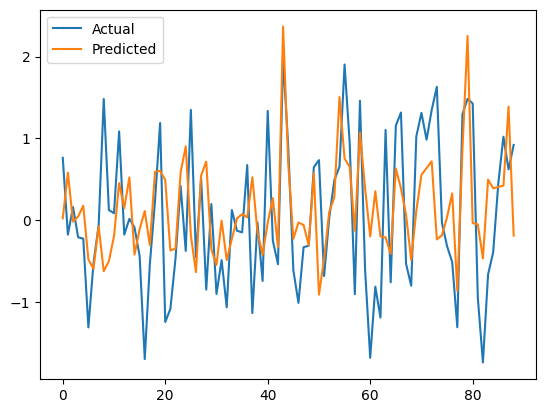

In [ ]:
com.plot()

RandomForest

In [ ]:
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [1000, 2000 , 4000,5000,6000,7000],
    'max_depth': [20, 25,30,35,40,45,50],

}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([ 2.97487912,  4.77905407,  9.43848801, 12.57087874, 14.43143711,
        17.16619635,  2.37465572,  5.05109801,  9.7228364 , 12.10932841,
        14.52587323, 16.49510908,  2.38544941,  4.99925489,  9.68978653,
        11.9957242 , 14.42785888, 16.07018714,  2.29295483,  4.58191552,
         9.37694559, 11.24449234, 13.81949301, 15.78635206,  2.2967154 ,
         4.65877662,  9.48850427, 11.24964137, 13.73008471, 16.06734161,
         2.14247732,  4.51522965,  9.01454325, 11.35847635, 13.69697752,
        15.88536701,  2.19180579,  4.58052549,  9.03186135, 11.28821263,
        13.61825919, 15.91587324]),
 'std_fit_time': array([0.67188284, 0.46638991, 0.48762222, 1.07596533, 0.3081029 ,
        0.81708677, 0.35248423, 0.58708982, 0.34693876, 0.12534045,
        0.59537585, 0.45926161, 0.2991208 , 0.45458367, 0.21334289,
        0.05470512, 0.53011088, 0.39329585, 0.24228166, 0.3912492 ,
        0.1526208 , 0.32866128, 0.36760196, 0.22452639, 0.30990043,
       

In [ ]:
df_rf = pd.DataFrame(clf.cv_results_)
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.974879,0.671883,0.051663,0.009018,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.351735,0.286950,0.205631,0.243842,0.168657,0.251363,0.063764,15
1,4.779054,0.466390,0.094970,0.020714,20,2000,"{'max_depth': 20, 'n_estimators': 2000}",0.358154,0.286254,0.202839,0.232017,0.167741,0.249401,0.066819,35
2,9.438488,0.487622,0.191928,0.040904,20,4000,"{'max_depth': 20, 'n_estimators': 4000}",0.353668,0.281637,0.201480,0.238569,0.166816,0.248434,0.065023,38
3,12.570879,1.075965,0.313761,0.039763,20,5000,"{'max_depth': 20, 'n_estimators': 5000}",0.353011,0.284437,0.209558,0.235501,0.177447,0.251991,0.061460,7
4,14.431437,0.308103,0.359677,0.207661,20,6000,"{'max_depth': 20, 'n_estimators': 6000}",0.355538,0.283961,0.207545,0.236482,0.169589,0.250623,0.064406,23
5,17.166196,0.817087,0.351317,0.076964,20,7000,"{'max_depth': 20, 'n_estimators': 7000}",0.349295,0.287972,0.208320,0.231653,0.171324,0.249713,0.062554,32
6,2.374656,0.352484,0.048293,0.006436,25,1000,"{'max_depth': 25, 'n_estimators': 1000}",0.354900,0.289033,0.207361,0.228640,0.177199,0.251427,0.063390,14
7,5.051098,0.587090,0.099425,0.024948,25,2000,"{'max_depth': 25, 'n_estimators': 2000}",0.348005,0.284617,0.198545,0.236358,0.167242,0.246953,0.063937,40
8,9.722836,0.346939,0.197513,0.036014,25,4000,"{'max_depth': 25, 'n_estimators': 4000}",0.358891,0.280724,0.204057,0.239227,0.174286,0.251437,0.064421,13
9,12.109328,0.125340,0.216551,0.006064,25,5000,"{'max_depth': 25, 'n_estimators': 5000}",0.351980,0.288373,0.204915,0.240686,0.170282,0.251248,0.063779,16


In [ ]:
df_rf[['param_max_depth','param_n_estimators','mean_test_score']]

,param_max_depth,param_n_estimators,mean_test_score
0,20,1000,0.251363
1,20,2000,0.249401
2,20,4000,0.248434
3,20,5000,0.251991
4,20,6000,0.250623
5,20,7000,0.249713
6,25,1000,0.251427
7,25,2000,0.246953
8,25,4000,0.251437
9,25,5000,0.251248


In [ ]:
clf.best_params_

{'max_depth': 40, 'n_estimators': 1000}

In [ ]:
clf.best_score_

0.25519240601495274

In [ ]:
rf = RandomForestRegressor(
    max_depth = 5,
    n_estimators=2000,

)

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=2000)

In [ ]:
rf.score(xtest,ytest)

0.24175617014394735

In [ ]:
pred_rf = rf.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_rf)
mse = mean_squared_error(ytest,pred_rf)
rmse = mean_squared_error(ytest,pred_rf, squared = False)
r2 = r2_score(ytest,pred_rf)


nse= calculate_nse(ytest, pred_rf)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)


NSE coefficient: 0.24175617014394735
Mean Absolute Error: 0.6469537508289455
Mean Squared Error: 0.6272966412892275
r2 score: 0.24175617014394735
RMSE: 0.7920206066064364


In [ ]:
com = pd.concat([ytest, pd.Series(pred_rf,index=xtest.index)],axis=1)

In [ ]:
com

,spei3,0
397,0.762966,0.506776
203,-0.174516,0.547307
119,0.162837,-0.231367
331,-0.206332,-0.177154
175,-0.223758,0.253513
...,...,...
306,-0.388914,-0.137651
215,0.452028,0.103870
89,1.020785,0.350947
198,0.621599,0.931432


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,0.762966,0.506776
1,-0.174516,0.547307
2,0.162837,-0.231367
3,-0.206332,-0.177154
4,-0.223758,0.253513
...,...,...
84,-0.388914,-0.137651
85,0.452028,0.103870
86,1.020785,0.350947
87,0.621599,0.931432


<Axes: >

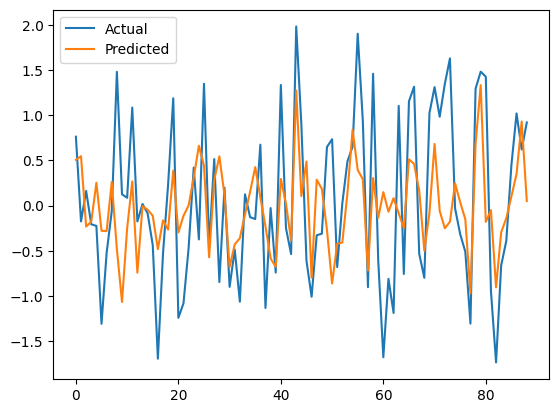

In [ ]:
com.plot()

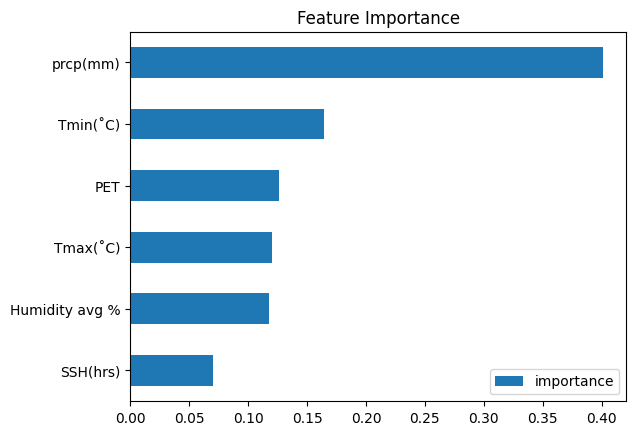

In [ ]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

KNN

In [ ]:
clf = GridSearchCV(KNeighborsRegressor(), {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform','distance'],
    'leaf_size': [25,30,35,40]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00325584, 0.0019073 , 0.00183821, 0.00184102, 0.00214772,
        0.00241313, 0.00236034, 0.00192747, 0.00179939, 0.00187159,
        0.00178266, 0.0018054 , 0.00178814, 0.00181808, 0.00188169,
        0.00184946, 0.00185313, 0.0017632 , 0.00225382, 0.0017684 ,
        0.00199914, 0.00192204, 0.0017355 , 0.00194798, 0.00186291,
        0.00188632, 0.00191875, 0.00189176, 0.00189939, 0.00193963,
        0.00261946, 0.00192246]),
 'std_fit_time': array([1.44223460e-03, 5.46654653e-05, 6.40843240e-05, 4.45908781e-05,
        3.18500466e-04, 3.47484347e-04, 4.04088559e-04, 1.43869412e-04,
        5.87147854e-05, 2.46784168e-04, 8.22130044e-05, 9.21157078e-05,
        8.10808273e-05, 7.21156260e-05, 1.11899936e-04, 4.57394471e-05,
        5.03946271e-05, 6.39645723e-05, 4.81714774e-04, 7.31303123e-05,
        3.15518936e-04, 1.51843146e-04, 6.41195109e-05, 1.78231792e-04,
        6.64832420e-05, 8.36968617e-05, 5.25132603e-05, 7.18866770e-05,
        1.48423147e-0

In [ ]:
df_knn = pd.DataFrame(clf.cv_results_)
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003256,0.001442,0.003672,0.001957,25,3,uniform,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",0.269381,0.018636,0.146059,0.117069,-0.064734,0.097282,0.113862,25
1,0.001907,0.000055,0.001963,0.000213,25,3,distance,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",0.252431,0.012015,0.144855,0.113440,-0.038360,0.096877,0.102239,29
2,0.001838,0.000064,0.001782,0.000052,25,5,uniform,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",0.308835,0.086644,0.225412,0.178101,-0.032635,0.153271,0.117491,21
3,0.001841,0.000045,0.002057,0.000330,25,5,distance,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",0.332409,0.074379,0.230844,0.164967,-0.010879,0.158344,0.119403,17
4,0.002148,0.000319,0.002235,0.000392,25,7,uniform,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",0.264956,0.129475,0.286069,0.291606,0.037935,0.202008,0.101230,9
5,0.002413,0.000347,0.002315,0.000310,25,7,distance,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",0.335351,0.129300,0.284926,0.265830,0.037310,0.210544,0.110251,5
6,0.002360,0.000404,0.002168,0.000307,25,9,uniform,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",0.241161,0.138485,0.264906,0.293893,0.069020,0.201493,0.084441,13
7,0.001927,0.000144,0.002131,0.000446,25,9,distance,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",0.310692,0.145414,0.268028,0.277626,0.067056,0.213763,0.092318,1
8,0.001799,0.000059,0.001762,0.000071,30,3,uniform,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",0.269381,0.018636,0.146059,0.117069,-0.064734,0.097282,0.113862,25
9,0.001872,0.000247,0.001821,0.000112,30,3,distance,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",0.252431,0.012015,0.144855,0.113440,-0.038360,0.096877,0.102239,29


In [ ]:
df_knn[['param_leaf_size','param_n_neighbors','param_weights', 'mean_test_score']]

,param_leaf_size,param_n_neighbors,param_weights,mean_test_score
0,25,3,uniform,0.097282
1,25,3,distance,0.096877
2,25,5,uniform,0.153271
3,25,5,distance,0.158344
4,25,7,uniform,0.202008
5,25,7,distance,0.210544
6,25,9,uniform,0.201493
7,25,9,distance,0.213763
8,30,3,uniform,0.097282
9,30,3,distance,0.096877


In [ ]:
clf.best_params_

{'leaf_size': 25, 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
clf.best_score_

0.21376304319952372

In [ ]:
knn=KNeighborsRegressor(n_neighbors=9, weights='uniform', algorithm='auto', leaf_size=25)

In [ ]:
knn.fit(xtrain, ytrain)


KNeighborsRegressor(leaf_size=25, n_neighbors=9)

In [ ]:
knn.score(xtest,ytest)

0.15601840259654332

In [ ]:
pred_knn = knn.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_knn)
mse = mean_squared_error(ytest,pred_knn)
rmse = mean_squared_error(ytest,pred_knn, squared = False)
r2 = r2_score(ytest,pred_knn)

nse = calculate_nse(ytest, pred_knn)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.15601840259654332
Mean Absolute Error: 0.6893935479444684
Mean Squared Error: 0.6982276683499203
r2 score: 0.15601840259654332
RMSE: 0.8356001845080698


In [ ]:
com = pd.concat([ytest, pd.Series(pred_knn,index=xtest.index)],axis=1)
com

,spei3,0
397,0.762966,0.668521
203,-0.174516,0.482537
119,0.162837,-0.465703
331,-0.206332,0.331095
175,-0.223758,0.165495
...,...,...
306,-0.388914,0.243456
215,0.452028,0.299713
89,1.020785,0.206521
198,0.621599,1.142707


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,0.762966,0.668521
1,-0.174516,0.482537
2,0.162837,-0.465703
3,-0.206332,0.331095
4,-0.223758,0.165495
...,...,...
84,-0.388914,0.243456
85,0.452028,0.299713
86,1.020785,0.206521
87,0.621599,1.142707


<Axes: >

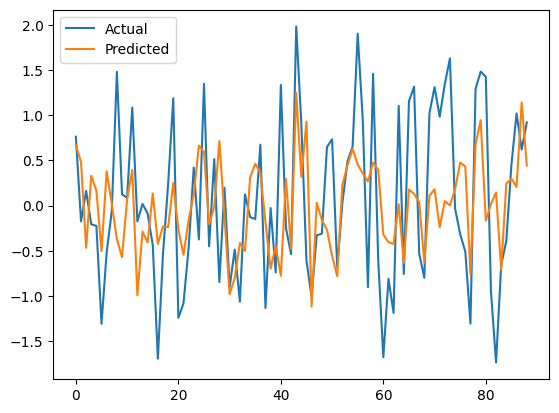

In [ ]:
com.plot()

DTR

In [ ]:
clf = GridSearchCV(DecisionTreeRegressor(), {
    'splitter':['best','random']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00450997, 0.0022243 ]),
 'std_fit_time': array([2.97577990e-03, 9.81364699e-05]),
 'mean_score_time': array([0.00155377, 0.00133281]),
 'std_score_time': array([3.19470398e-04, 4.28181183e-05]),
 'param_splitter': masked_array(data=['best', 'random'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'splitter': 'best'}, {'splitter': 'random'}],
 'split0_test_score': array([-0.34214283, -0.16674113]),
 'split1_test_score': array([-0.28600149, -0.31488459]),
 'split2_test_score': array([-0.3239985 , -0.50183853]),
 'split3_test_score': array([-0.23561372, -0.55731105]),
 'split4_test_score': array([-0.34474016, -0.34163702]),
 'mean_test_score': array([-0.30649934, -0.37648246]),
 'std_test_score': array([0.04119216, 0.13958012]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:

df_dtr = pd.DataFrame(clf.cv_results_)
df_dtr


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004510,0.002976,0.001554,0.000319,best,{'splitter': 'best'},-0.342143,-0.286001,-0.323998,-0.235614,-0.344740,-0.306499,0.041192,1
1,0.002224,0.000098,0.001333,0.000043,random,{'splitter': 'random'},-0.166741,-0.314885,-0.501839,-0.557311,-0.341637,-0.376482,0.139580,2


In [ ]:
df_dtr[['param_splitter','mean_test_score']]

,param_splitter,mean_test_score
0,best,-0.306499
1,random,-0.376482


In [ ]:
clf.best_params_

{'splitter': 'best'}

In [ ]:
clf.best_score_

-0.30649933859401385

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor()

In [ ]:
pred_dtr = dtr.predict(xtest)

In [ ]:
dtr.score(xtest,ytest)

-0.4768909786173783

In [ ]:
mae = mean_absolute_error(ytest,pred_dtr)
mse = mean_squared_error(ytest,pred_dtr)
rmse = mean_squared_error(ytest,pred_dtr, squared = False)
r2 = r2_score(ytest,pred_dtr)

nse = calculate_nse(ytest, pred_dtr)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: -0.4768909786173783
Mean Absolute Error: 0.8702729309101123
Mean Squared Error: 1.2218348688876526
r2 score: -0.4768909786173783
RMSE: 1.1053663957655184


In [ ]:
com = pd.concat([ytest, pd.Series(pred_dtr,index=xtest.index)],axis=1)
com

,spei3,0
397,0.762966,0.272084
203,-0.174516,1.390616
119,0.162837,-1.450317
331,-0.206332,-1.386757
175,-0.223758,-0.344777
...,...,...
306,-0.388914,0.236880
215,0.452028,0.882873
89,1.020785,0.410748
198,0.621599,0.262374


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,0.762966,0.272084
1,-0.174516,1.390616
2,0.162837,-1.450317
3,-0.206332,-1.386757
4,-0.223758,-0.344777
...,...,...
84,-0.388914,0.236880
85,0.452028,0.882873
86,1.020785,0.410748
87,0.621599,0.262374


<Axes: >

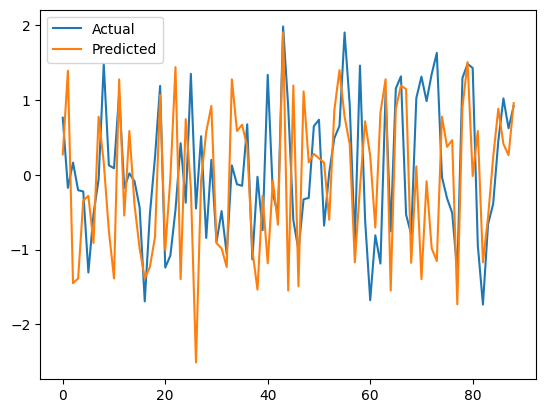

In [ ]:
com.plot()

XGB

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
clf = GridSearchCV(XGBRegressor(), {
    'learning_rate': [0.05,0.1,0.5],
    'max_depth': [5,10,15,20,22],
    'n_estimators':[500,1000,2000,4000]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.32814379, 0.61220837, 0.8324182 , 1.62272129, 0.37631879,
        0.48330002, 1.01058321, 1.15705028, 0.74466648, 0.54176407,
        0.76770563, 1.6259584 , 0.44339352, 0.53925476, 1.0996841 ,
        1.20642171, 0.76685843, 0.55782733, 0.77874222, 1.52436919,
        0.30744534, 0.41702247, 1.19562936, 1.05510435, 0.24766846,
        0.35960908, 0.88057585, 0.9978518 , 0.26649799, 0.69752169,
        0.59965067, 1.06195803, 0.91027355, 0.38117442, 0.61347203,
        1.34874573, 0.28435044, 0.38363628, 0.59207406, 1.34506559,
        0.15681834, 0.25903339, 0.47183189, 1.21384835, 0.1512691 ,
        0.24969935, 0.47107658, 0.88666086, 0.45732007, 0.24502149,
        0.45660682, 0.88503017, 0.1571455 , 0.56422553, 0.47358356,
        0.91384454, 0.14562469, 0.24193282, 0.79286337, 0.93714166]),
 'std_fit_time': array([0.0147121 , 0.00954992, 0.01996628, 0.64242405, 0.00973571,
        0.02540169, 0.63850618, 0.03320275, 0.60547218, 0.02347507,
        0.017

In [ ]:
df_xgb = pd.DataFrame(clf.cv_results_)
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.328144,0.014712,0.004623,0.000261,0.05,5,500,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.271767,0.232365,0.073443,0.238231,-0.051950,0.152771,0.123290,9
1,0.612208,0.009550,0.006128,0.000272,0.05,5,1000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.268230,0.231874,0.068654,0.237135,-0.064001,0.148378,0.127023,10
2,0.832418,0.019966,0.006353,0.000089,0.05,5,2000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.268230,0.231875,0.068572,0.237121,-0.064238,0.148312,0.127111,12
3,1.622721,0.642424,0.007273,0.000099,0.05,5,4000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.268230,0.231875,0.068572,0.237121,-0.064238,0.148312,0.127111,11
4,0.376319,0.009736,0.005062,0.000093,0.05,10,500,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.131655,0.143338,0.076743,0.148267,-0.050465,0.089908,0.074674,34
5,0.483300,0.025402,0.005676,0.000519,0.05,10,1000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.131655,0.143338,0.076743,0.148267,-0.050465,0.089908,0.074674,33
6,1.010583,0.638506,0.005537,0.000125,0.05,10,2000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.131655,0.143338,0.076743,0.148267,-0.050465,0.089908,0.074674,35
7,1.157050,0.033203,0.005851,0.000204,0.05,10,4000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.131655,0.143338,0.076743,0.148267,-0.050465,0.089908,0.074674,36
8,0.744666,0.605472,0.005928,0.000830,0.05,15,500,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.136711,0.075849,-0.013069,0.140956,-0.157568,0.036576,0.111912,57
9,0.541764,0.023475,0.005694,0.000268,0.05,15,1000,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.136711,0.075849,-0.013069,0.140956,-0.157568,0.036576,0.111912,58


In [ ]:
df_xgb[['param_learning_rate','param_max_depth','param_n_estimators', 'mean_test_score']]

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score
0,0.05,5,500,0.152771
1,0.05,5,1000,0.148378
2,0.05,5,2000,0.148312
3,0.05,5,4000,0.148312
4,0.05,10,500,0.089908
5,0.05,10,1000,0.089908
6,0.05,10,2000,0.089908
7,0.05,10,4000,0.089908
8,0.05,15,500,0.036576
9,0.05,15,1000,0.036576


In [ ]:
clf.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
clf.best_score_

0.17088336829078765

In [ ]:
xgb = XGBRegressor(
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators=500
)

In [ ]:
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred_xgb = xgb.predict(xtest)

In [ ]:
xgb.score(xtest,ytest)

0.00013262445468309458

In [ ]:
mae = mean_absolute_error(ytest,pred_xgb)
mse = mean_squared_error(ytest,pred_xgb)
rmse = mean_squared_error(ytest,pred_xgb, squared = False)
r2 = r2_score(ytest,pred_xgb)

nse = calculate_nse(ytest, pred_xgb)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.00013262445468309458
Mean Absolute Error: 0.7293878746240898
Mean Squared Error: 0.8271922852749414
r2 score: 0.00013262445468309458
RMSE: 0.9095011188970256


In [ ]:
com = pd.concat([ytest, pd.Series(pred_xgb,index=xtest.index)],axis=1)
com

,spei3,0
397,0.762966,0.990191
203,-0.174516,0.686609
119,0.162837,-0.107794
331,-0.206332,-0.169086
175,-0.223758,0.765869
...,...,...
306,-0.388914,-0.283606
215,0.452028,1.080075
89,1.020785,0.356769
198,0.621599,1.138747


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,0.762966,0.990191
1,-0.174516,0.686609
2,0.162837,-0.107794
3,-0.206332,-0.169086
4,-0.223758,0.765869
...,...,...
84,-0.388914,-0.283606
85,0.452028,1.080075
86,1.020785,0.356769
87,0.621599,1.138747


<Axes: >

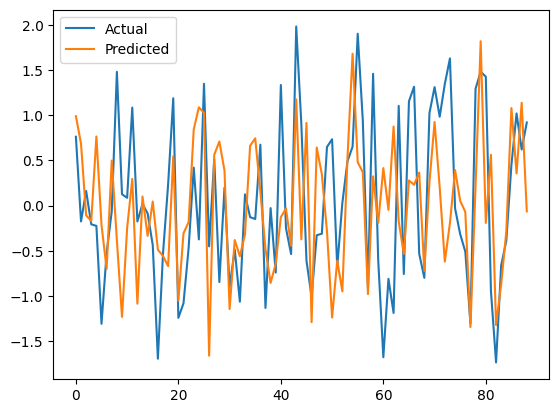

In [ ]:
com.plot()